In [1]:
from pathlib import Path
from defi_assessment.modelling import contract

In [2]:

p = Path('/mnt/d/projects/Defi-Lending-Evaluation/data/')
fnames = contract.find_data_file(p)
df = contract.read_data(fnames)
display(df.shape)
df = df.dropna()
display(df.shape)
df.head()

(19392, 17)

(19392, 17)

,commit,la,ld,ns,nd,nf,ent,nuc,ndev,inter,exp,rexp,sexp,pod,fix,buggy,plat
0,ca96d695,966,37,3,7,14,1.332095,62,1,64.008765,210,0.029312,188,1.000000,False,False,88mph_matrix
1,1d02a6bb,7,7,3,4,5,1.220036,29,1,294.411611,117,0.004706,44,1.000000,False,False,88mph_matrix
2,33639778,24751,115,2,3,44,1.089848,39,2,569.835787,91,0.020129,26,0.487179,False,True,88mph_matrix
3,2383726a,3,1,1,1,1,0.026486,59,1,118.513333,152,0.402389,104,1.000000,True,False,88mph_matrix
4,d01b89b9,31,19,3,3,11,3.046779,10,1,16.237778,77,0.006936,26,1.000000,True,False,88mph_matrix


In [3]:
df.dtypes

commit     object
la          int64
ld          int64
ns          int64
nd          int64
nf          int64
ent       float64
nuc         int64
ndev        int64
inter     float64
exp         int64
rexp      float64
sexp        int64
pod       float64
fix          bool
buggy        bool
plat       object
dtype: object

In [4]:
df.describe()

,la,ld,ns,nd,nf,ent,nuc,ndev,inter,exp,rexp,sexp,pod
count,19392.000000,19392.000000,19392.000000,19392.000000,19392.000000,19392.000000,19392.000000,19392.000000,19392.000000,19392.000000,19392.000000,19392.000000,19392.000000
mean,684.168626,10.832766,1.462304,2.291409,4.540171,0.664470,80.272535,5.390316,272.133537,247.492162,0.257154,134.928785,0.460632
std,5971.473919,41.170533,0.946794,3.087003,13.380691,2.532073,141.699653,5.229826,723.060757,432.260136,0.516910,290.362055,0.378908
min,0.000000,0.000000,0.000000,0.000000,0.000000,-29.378968,0.000000,0.000000,-2155.811389,0.000000,-16.641403,0.000000,0.000000
25%,3.000000,1.000000,1.000000,1.000000,1.000000,0.067497,9.000000,2.000000,1.059792,21.000000,0.007126,8.000000,0.090909
50%,19.000000,4.000000,1.000000,1.000000,2.000000,0.248694,30.000000,4.000000,31.551667,87.000000,0.049841,35.000000,0.387097
75%,87.000000,9.000000,2.000000,2.000000,4.000000,0.590007,87.000000,7.000000,210.423438,275.000000,0.315467,112.000000,0.885917
max,486679.000000,1685.000000,12.000000,113.000000,479.000000,126.526839,1989.000000,41.000000,18159.963056,2507.000000,19.021532,2292.000000,1.000000


False    18163
True      1229
Name: buggy, dtype: int64

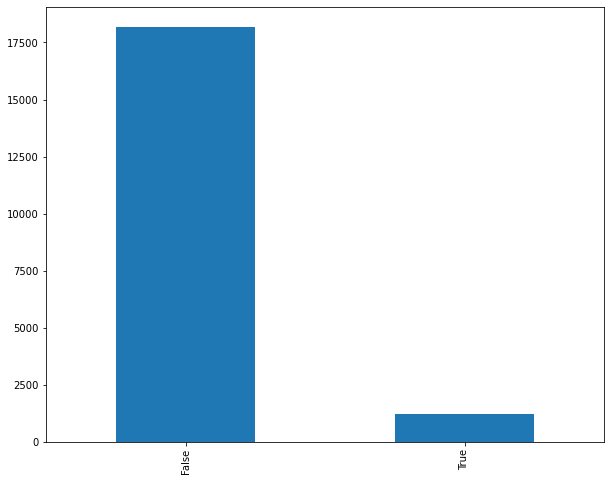

In [5]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10, 8))
ax = df['buggy'].value_counts().plot.bar()
df['buggy'].value_counts()

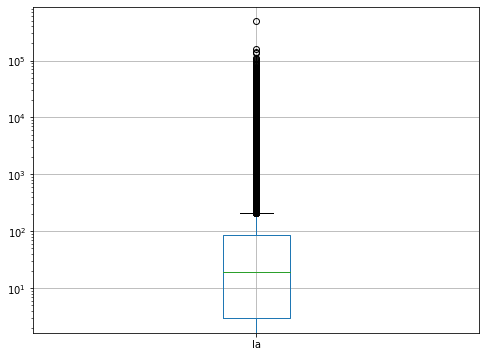

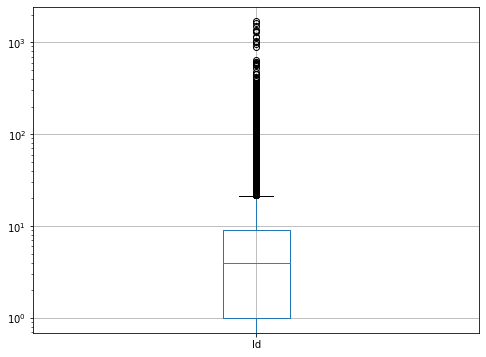

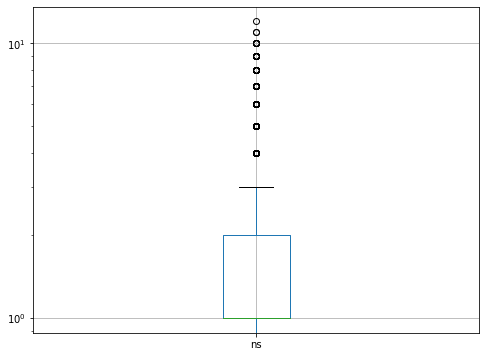

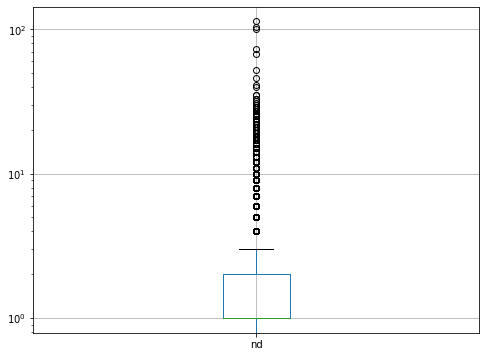

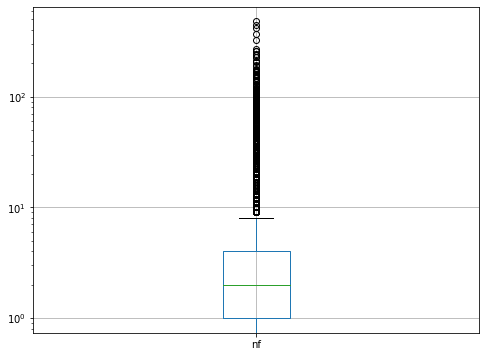

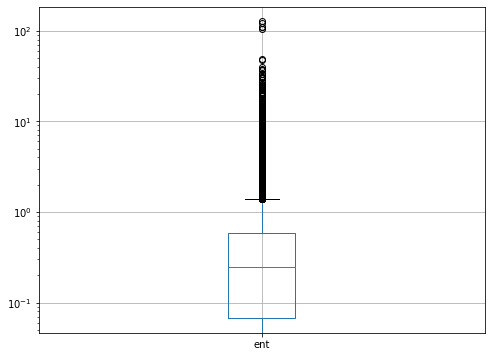

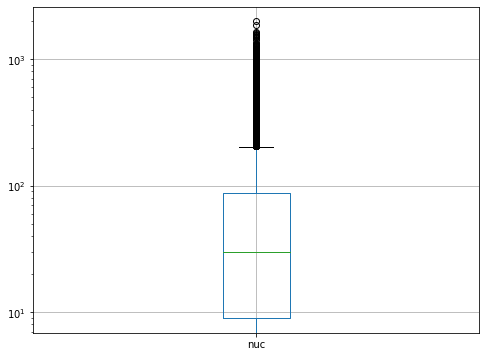

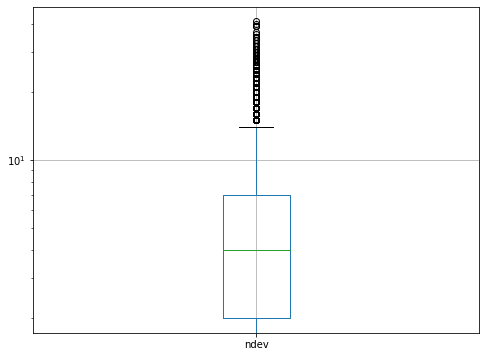

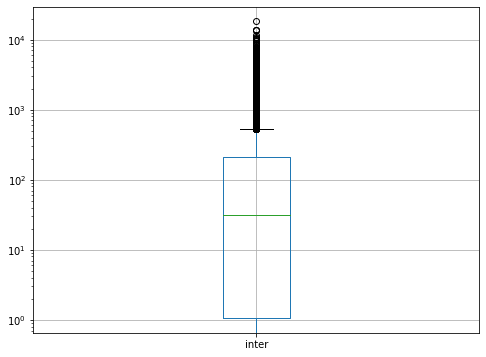

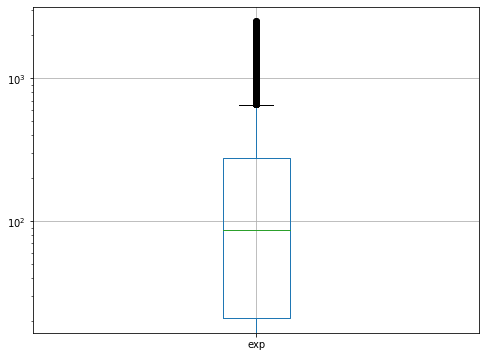

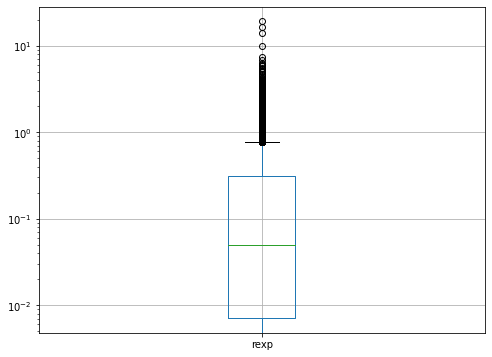

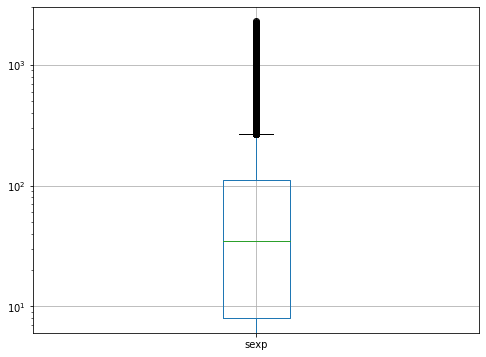

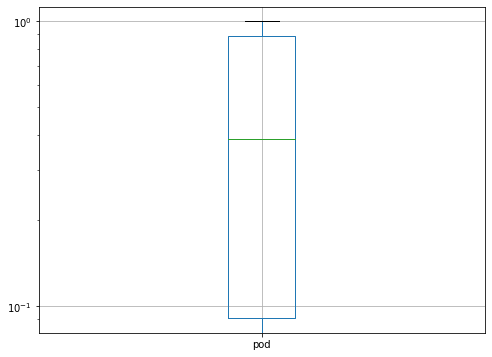

In [6]:
for col in df:
    if col in ['commit', 'fix', 'buggy', 'plat']:
        continue
    plt.figure(figsize=(8, 6))
    ax = df.boxplot([col])
    ax.set_yscale('log')

In [7]:
# remove commit with too many added lines, since those changes may mainly due to
# the modification of configurations files (like json, yaml, and so on.)
q99 = df['la'].quantile(0.995)
display(q99)
df1 = df[df['la'] < q99]
display(df.shape)
display(df1.shape)

29755.47999999905

(19392, 17)

(19295, 17)

In [8]:
q99 = df1['ent'].quantile(0.995)
display(q99)
df2 = df1[df1['ent'] < q99]
display(df2.shape)

10.40753894187188

(19198, 17)

In [9]:
q99 = df2['nf'].quantile(0.995)
display(q99)
df3 = df2[df2['ent'] < q99]
display(df3.shape)

47.01499999999942

(19198, 17)

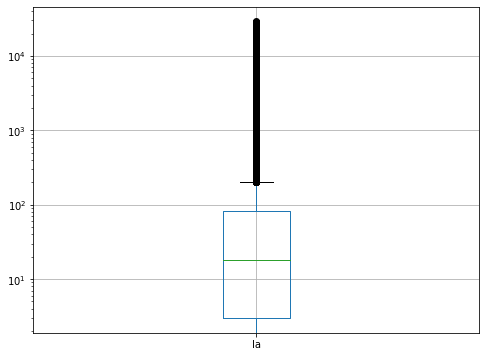

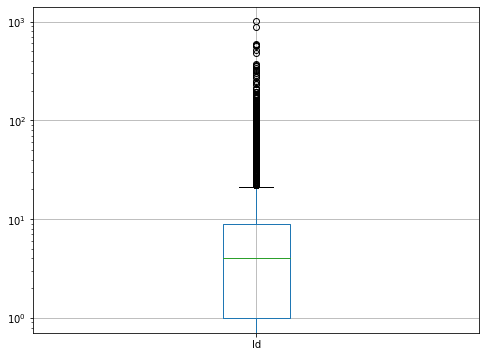

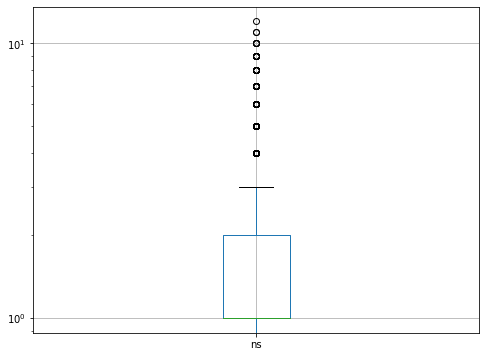

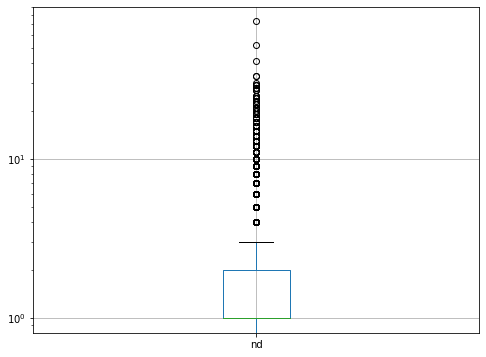

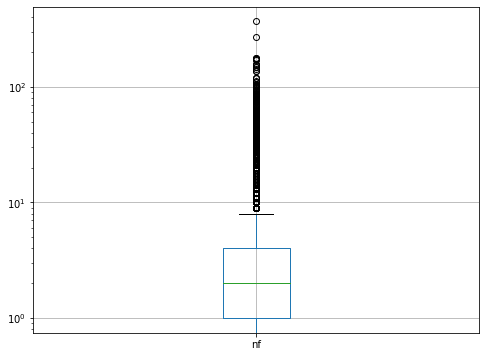

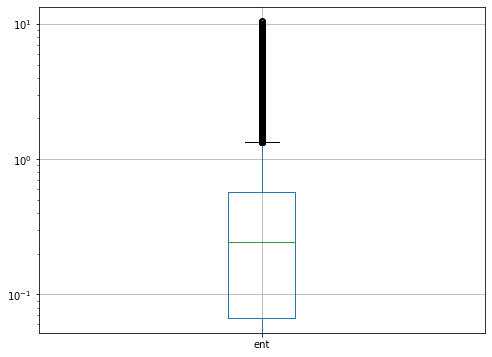

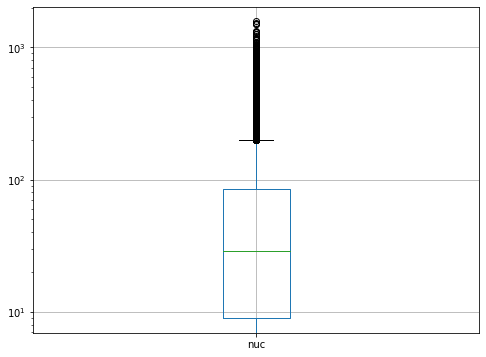

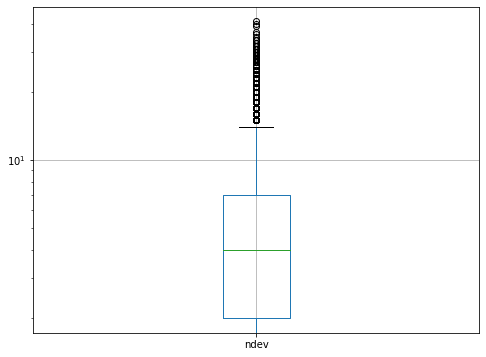

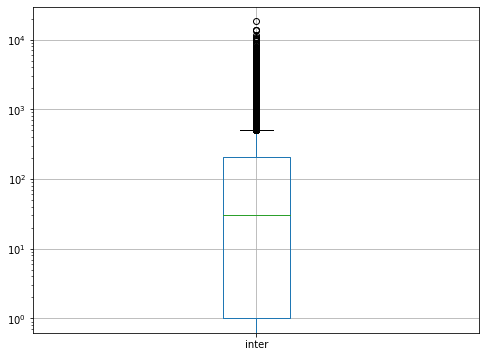

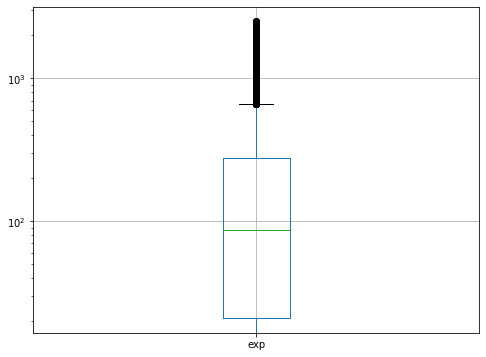

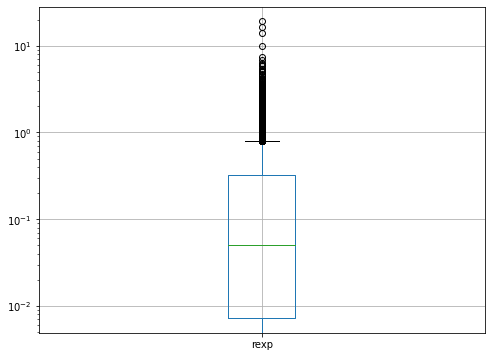

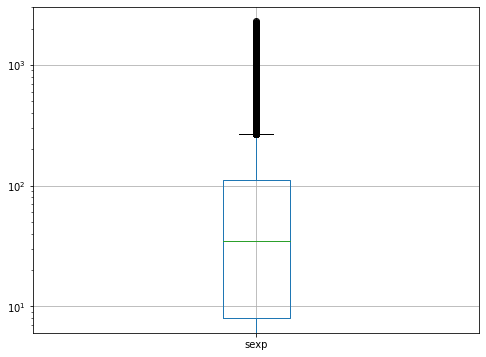

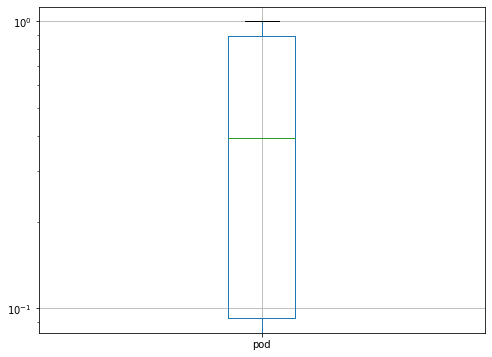

In [10]:
for col in df3:
    if col in ['commit', 'fix', 'buggy', 'plat']:
        continue
    plt.figure(figsize=(8, 6))
    ax = df3.boxplot([col])
    ax.set_yscale('log') 

In [11]:
df3['buggy'].value_counts()

False    18047
True      1151
Name: buggy, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df1, test_size=0.3, random_state=28)


In [13]:
display(test['buggy'].value_counts())
display(train['buggy'].value_counts())

False    5456
True      333
Name: buggy, dtype: int64

False    12651
True       855
Name: buggy, dtype: int64

In [14]:
train_x = train.drop(['commit', 'buggy', 'plat'], axis=1)
train_y = train['buggy']
display(train_x)
train_y

,la,ld,ns,nd,nf,ent,nuc,ndev,inter,exp,rexp,sexp,pod,fix
9857,0,1,1,1,1,0.000000,21,1,4.874722,32,0.070674,23,1.000000,False
8866,1,1,1,1,1,0.009192,96,5,0.021667,171,0.789600,79,0.197917,True
14531,30,0,1,1,1,0.400124,19,6,144.810278,89,0.010756,3,0.000000,False
5743,2,2,1,1,2,0.054137,478,22,0.255972,215,1.163901,201,0.420502,False
7993,34,3,1,2,2,0.643595,12,5,2255.308056,3,0.164439,3,0.083333,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16568,2,1,1,1,1,0.023643,20,4,12.618333,64,0.905040,63,0.250000,False
7492,4,2,1,1,1,0.083051,62,14,169.081389,187,0.224153,85,0.112903,False
7265,10,2,1,1,1,0.004629,10,7,306.936944,72,0.006298,36,0.300000,True
4121,87,3,1,2,2,0.511285,16,2,21.659167,24,0.007412,17,0.750000,False


9857     False
8866     False
14531    False
5743     False
7993     False
         ...  
16568    False
7492     False
7265     False
4121     False
9560     False
Name: buggy, Length: 13506, dtype: bool

In [15]:
# from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SVMSMOTE

x_resampled, y_resampled = SVMSMOTE(random_state=97).fit_resample(train_x, train_y)
display(x_resampled.shape)
display(x_resampled)
display(y_resampled.shape)
display(y_resampled)
display(y_resampled.value_counts())

(25302, 14)

,la,ld,ns,nd,nf,ent,nuc,ndev,inter,exp,rexp,sexp,pod,fix
0,0,1,1,1,1,0.000000,21,1,4.874722,32,0.070674,23,1.000000,False
1,1,1,1,1,1,0.009192,96,5,0.021667,171,0.789600,79,0.197917,True
2,30,0,1,1,1,0.400124,19,6,144.810278,89,0.010756,3,0.000000,False
3,2,2,1,1,2,0.054137,478,22,0.255972,215,1.163901,201,0.420502,False
4,34,3,1,2,2,0.643595,12,5,2255.308056,3,0.164439,3,0.083333,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25297,6834,182,4,22,67,16.726248,258,6,138.491091,12,0.001589,16,0.052161,True
25298,6730,0,1,1,2,0.447760,451,12,393.238009,403,-0.002688,265,0.242174,False
25299,13946,327,6,15,127,17.605480,22,4,167.595107,-2,-0.000042,-2,-0.054914,False
25300,1955,111,1,12,32,5.436907,209,9,335.176526,522,-0.008816,20,0.231977,False


(25302,)

0        False
1        False
2        False
3        False
4        False
         ...  
25297     True
25298     True
25299     True
25300     True
25301     True
Name: buggy, Length: 25302, dtype: bool

False    12651
True     12651
Name: buggy, dtype: int64

In [16]:
# from sklearn.ensemble import RandomForestClassifier

# rf = RandomForestClassifier(n_estimators=300, random_state=28)
# rf.fit(x_resampled, y_resampled)

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

knn = KNeighborsClassifier()
knn.fit(StandardScaler().fit_transform(x_resampled), y_resampled)

KNeighborsClassifier()

In [18]:
test_x = test.drop(['commit', 'buggy', 'plat'], axis=1)
test_y = test['buggy']
test_x = StandardScaler().fit_transform(test_x)

In [19]:
predictions = knn.predict(test_x)
predictions

array([ True, False,  True, ..., False, False,  True])

In [20]:
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, f1_score

report = classification_report(test_y, predictions)
unique_label = np.unique([test_y, predictions])
cmtx = pd.DataFrame(
    confusion_matrix(test_y, predictions, labels=unique_label), 
    index=['true:{:}'.format(x) for x in unique_label], 
    columns=['pred:{:}'.format(x) for x in unique_label]
)
print(report)
print(cmtx)

              precision    recall  f1-score   support

       False       0.97      0.69      0.81      5456
        True       0.11      0.66      0.20       333

    accuracy                           0.69      5789
   macro avg       0.54      0.68      0.50      5789
weighted avg       0.92      0.69      0.77      5789

            pred:False  pred:True
true:False        3751       1705
true:True          112        221


In [22]:
pred_prob = knn.predict_proba(test_x)

max_score = 0
th = 0

for i in range(1, 100):
    pred2 = (pred_prob[:,1] >= i/100)
    score = f1_score(test_y, pred2)
    if score > max_score:
        max_score = score
        th = i/100

print(f'Threshhold: {th}; Max-Score: {max_score}')
pred2 = (pred_prob[:,1] >= 0.7)
rep2 = classification_report(test_y, pred2)
print(rep2)
print(confusion_matrix(test_y, pred2))


Threshhold: 0.81; Max-Score: 0.2193396226415094
              precision    recall  f1-score   support

       False       0.96      0.81      0.88      5456
        True       0.13      0.49      0.21       333

    accuracy                           0.79      5789
   macro avg       0.55      0.65      0.54      5789
weighted avg       0.92      0.79      0.84      5789

[[4398 1058]
 [ 170  163]]
